# EDA para información entregada por Sernapesca

#### Introducción
Este Noteboopk corresponde al análisis exploratorio del archivo enviado por sernapesca llamado "existencias_moluscos.xlsx", se desconoce su origen.
 
Resumen:
* Tiene una dimensión de (2138, 19)
* Este archivo es una tabla con las existencias en toneladas de los centros de cultivo según el estado del producto a la fecha.
* Es solo para la Región de Los Lagos.
* Tiene sólo datos para las fechas 'Sep 2021', 'Aug 2021', 'Oct 2021'.
* Tiene varios tipos de especies.

### Import libreries

In [1]:
import logging
import subprocess
import os   
import pandas as pd
import seaborn as sns
import geopandas as gpd

### Reading file "Existencia moluscos"

In [2]:
%%time
existencias_molusc = gpd.read_file("../data/datos_sernapesca/centros_existencias/existencia_moluscos.shp")

CPU times: user 161 ms, sys: 15.7 ms, total: 176 ms
Wall time: 201 ms


In [3]:
existencias_molusc.shape

(2138, 19)

In [4]:
existencias_molusc.head()

,id,codigocent,codigoarea,titular,nombresect,estado_are,especies,toponimio,t_estadotr,t_grupoesp,c_tipoporc,superficie,psmb,tara_ton,e_adulto,e_juv,e_sem,fecha_3m,geometry
0,1,100019.0,None,"MUNICIPALIDAD DE CALBUCO, ILUSTRE",None,None,"CHOLGA, CHORITO, CHORO","ESTERO CHOPE, ISLA PULUQUI",CONCESION OTORGADA,MOLUSCOS,1.0,0.67,0,NaN,NaN,NaN,NaN,None,"POLYGON ((-73.07877 -41.81555, -73.07846 -41.8..."
1,2,100333.0,None,MOWI CHILE S.A.,None,None,"SALMON CEREZA, SALMON DEL ATLANTICO, SALMON KE...",ESTERO HUITO,CONCESION OTORGADA,SALMONES,1.0,18.69,0,NaN,NaN,NaN,NaN,None,"POLYGON ((-73.16417 -41.74235, -73.16138 -41.7..."
2,3,102647.0,None,"CARDENAS GALLARDO, RITA DEL CARMEN",None,None,"CHASCON O HUIRO NEGRO, COCHAYUYO, LUCHE, LUGA ...","RIO MAULLIN RIBERA NORTE, PARCELA O8",CONCESION OTORGADA,ALGAS,1.0,0.30,0,2.0,2.0,NaN,NaN,Sep 2021,"POLYGON ((-73.61653 -41.59560, -73.61644 -41.5..."
3,4,104370.0,None,"NAVARRO MANSILLA, MANUEL DEL CARMEN",None,None,"CHASCON O HUIRO NEGRO, COCHAYUYO, LUCHE, LUGA ...","RIO MAULLÍN RIBERA NORTE, PARCELA F5",CONCESION OTORGADA,ALGAS,1.0,0.32,0,NaN,NaN,NaN,NaN,None,"POLYGON ((-73.62907 -41.58916, -73.62894 -41.5..."
4,5,102090.0,None,"MANSILLA FIGUEROA, VICTOR ROLANDO",None,None,"OSTRA CHILENA, OSTRA DEL PACIFICO O JAPONESA",ESTERO TOCOIHUE,CONCESION OTORGADA,MOLUSCOS,1.0,1.50,0,0.3,0.3,NaN,NaN,Sep 2021,"POLYGON ((-73.44576 -42.32533, -73.44455 -42.3..."


In [6]:
existencias_molusc.columns.to_list()

['id',
 'codigocent',
 'codigoarea',
 'titular',
 'nombresect',
 'estado_are',
 'especies',
 'toponimio',
 't_estadotr',
 't_grupoesp',
 'c_tipoporc',
 'superficie',
 'psmb',
 'tara_ton',
 'e_adulto',
 'e_juv',
 'e_sem',
 'fecha_3m',
 'geometry']

In [14]:
existencias_molusc.dtypes

id               int64
codigocent     float64
codigoarea      object
titular         object
nombresect      object
estado_are      object
especies        object
toponimio       object
t_estadotr      object
t_grupoesp      object
c_tipoporc     float64
superficie     float64
psmb            object
tara_ton       float64
e_adulto       float64
e_juv          float64
e_sem          float64
fecha_3m        object
geometry      geometry
dtype: object

In [7]:
existencias_molusc.info

<bound method DataFrame.info of         id  codigocent codigoarea  \
0        1    100019.0       None   
1        2    100333.0       None   
2        3    102647.0       None   
3        4    104370.0       None   
4        5    102090.0       None   
...    ...         ...        ...   
2133  2134    102991.0      10327   
2134  2135    102252.0      10218   
2135  2136    102189.0       None   
2136  2137    101956.0       None   
2137  2138    103523.0       None   

                                                titular  \
0                     MUNICIPALIDAD DE CALBUCO, ILUSTRE   
1                                       MOWI CHILE S.A.   
2                    CARDENAS GALLARDO, RITA DEL CARMEN   
3                   NAVARRO MANSILLA, MANUEL DEL CARMEN   
4                     MANSILLA FIGUEROA, VICTOR ROLANDO   
...                                                 ...   
2133                                A. G. ESTERO YALDAD   
2134                       HUILDAD, SIND. DE PESCAD

In [8]:
existencias_molusc.describe()

,id,codigocent,c_tipoporc,superficie,tara_ton,e_adulto,e_juv,e_sem
count,2138.000000,2138.000000,2138.000000,2138.000000,1176.000000,1027.000000,12.000000,523.000000
mean,1069.500000,102616.153882,1.027128,9.210522,307.272704,261.337877,22.816667,177.217973
std,617.331758,2529.226929,0.162495,12.772789,557.097932,524.561726,22.526422,246.126065
min,1.000000,0.000000,1.000000,0.070000,0.000000,0.000000,0.500000,0.000000
25%,535.250000,101998.500000,1.000000,2.000000,11.000000,7.600000,5.200000,33.100000
50%,1069.500000,102742.500000,1.000000,5.000000,139.000000,106.800000,11.600000,90.000000
75%,1603.750000,103710.750000,1.000000,11.047500,400.500000,339.000000,40.475000,220.000000
max,2138.000000,104422.000000,2.000000,223.560000,10540.000000,10500.000000,63.900000,2060.000000


In [9]:
existencias_molusc.duplicated().sum()

0

In [10]:
existencias_molusc.isnull().sum()

id               0
codigocent       0
codigoarea    1497
titular          0
nombresect    1499
estado_are    1497
especies         0
toponimio        0
t_estadotr       0
t_grupoesp       0
c_tipoporc       0
superficie       0
psmb             0
tara_ton       962
e_adulto      1111
e_juv         2126
e_sem         1615
fecha_3m       962
geometry         0
dtype: int64

In [13]:
existencias_molusc.columns.to_list()

['id',
 'codigocent',
 'codigoarea',
 'titular',
 'nombresect',
 'estado_are',
 'especies',
 'toponimio',
 't_estadotr',
 't_grupoesp',
 'c_tipoporc',
 'superficie',
 'psmb',
 'tara_ton',
 'e_adulto',
 'e_juv',
 'e_sem',
 'fecha_3m',
 'geometry']

In [16]:
#ingresos_raw['Fecha'] = pd.to_datetime(ingresos_raw['Año'].astype(str) +'/'+ ingresos_raw['Mes'].astype(str), format="%Y/%m")
#ingresos_raw['Fecha'].unique().tolist()
existencias_molusc['fecha_3m'].astype(str).unique().tolist()

['None', 'Sep 2021', 'Aug 2021', 'Oct 2021']

In [17]:
#ingresos_raw['Especie'].unique().tolist()
existencias_molusc['codigocent'].unique().tolist()

[100019.0,
 100333.0,
 102647.0,
 104370.0,
 102090.0,
 103841.0,
 103353.0,
 103721.0,
 103514.0,
 102154.0,
 103936.0,
 104183.0,
 103337.0,
 104110.0,
 100065.0,
 103687.0,
 103901.0,
 102554.0,
 102786.0,
 100242.0,
 104020.0,
 103568.0,
 103807.0,
 103494.0,
 100216.0,
 104352.0,
 102024.0,
 102803.0,
 102291.0,
 102537.0,
 102695.0,
 102142.0,
 102381.0,
 104016.0,
 102567.0,
 102084.0,
 102788.0,
 104060.0,
 100649.0,
 100866.0,
 102386.0,
 104328.0,
 104327.0,
 104303.0,
 104398.0,
 102930.0,
 104269.0,
 101076.0,
 101088.0,
 102599.0,
 101774.0,
 101675.0,
 104390.0,
 100580.0,
 102188.0,
 102650.0,
 102397.0,
 102251.0,
 102858.0,
 100711.0,
 100709.0,
 100693.0,
 100281.0,
 100399.0,
 100339.0,
 100060.0,
 101914.0,
 100164.0,
 104139.0,
 100358.0,
 100117.0,
 100558.0,
 100638.0,
 102082.0,
 102749.0,
 101259.0,
 101258.0,
 100385.0,
 100634.0,
 103708.0,
 100194.0,
 100367.0,
 100099.0,
 101822.0,
 101773.0,
 102067.0,
 104272.0,
 104211.0,
 103744.0,
 104357.0,
 104401.0,

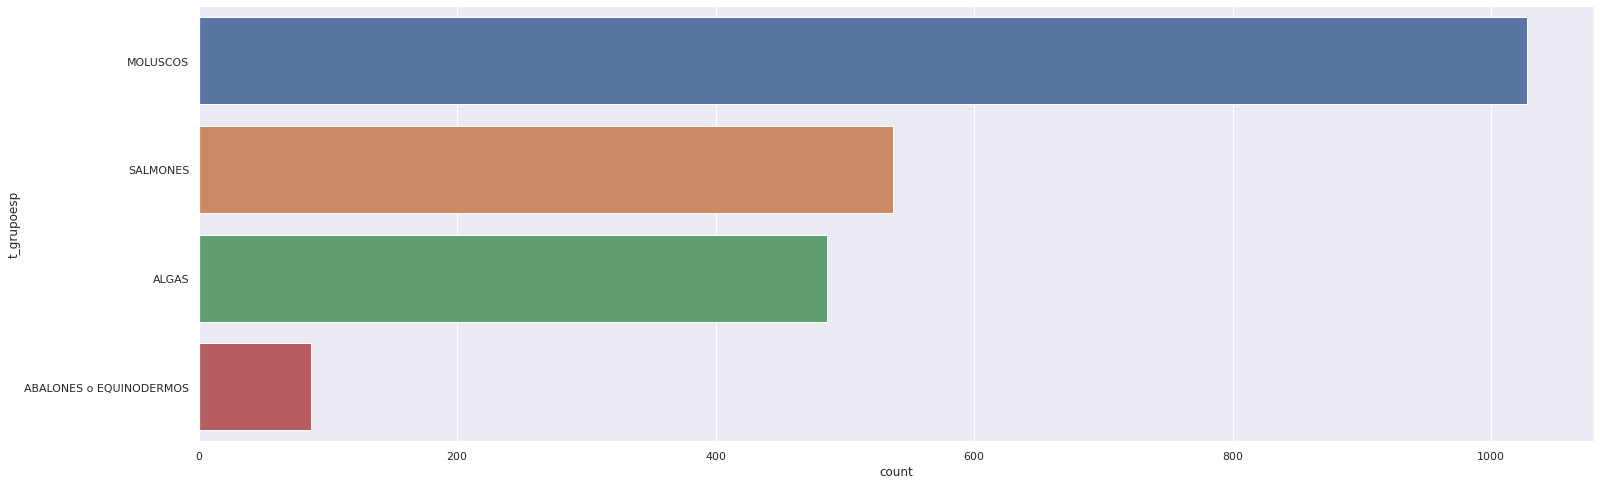

In [20]:
def count_clases(df, column_name):
    sns.set_theme(style="darkgrid")
    ax = sns.countplot(y=column_name, data=df)
    sns.set(rc = {'figure.figsize':(25,8)})
    #for item in ax.get_xticklabels():
    #    item.set_rotation(90)

count_clases(existencias_molusc,'t_grupoesp')

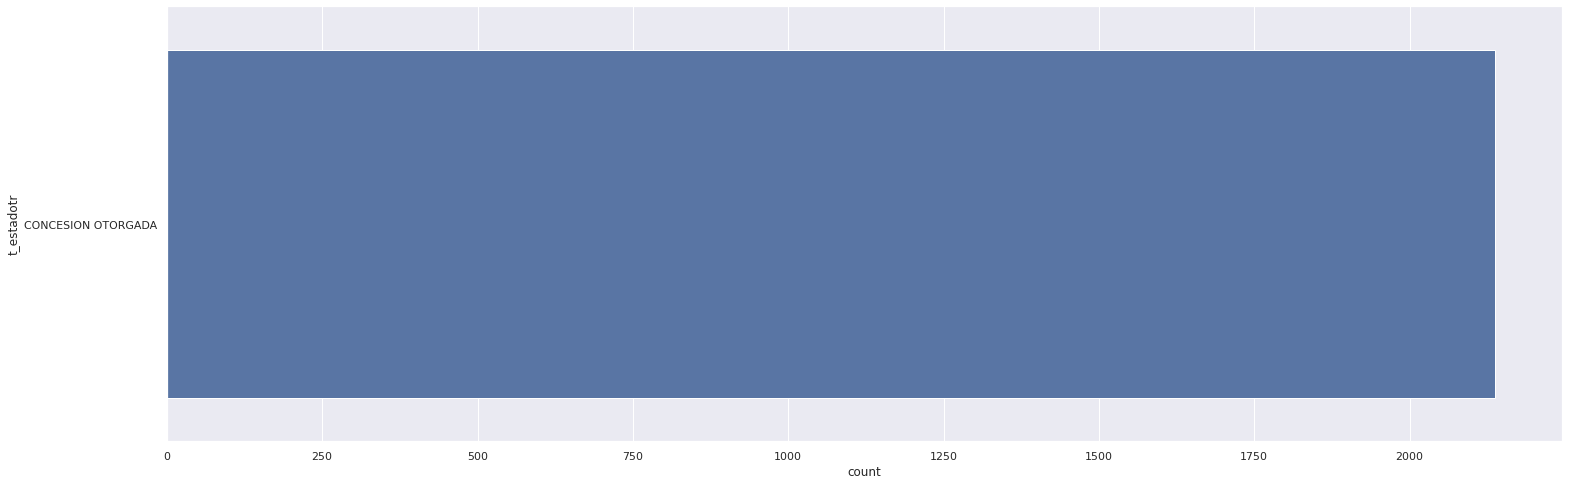

In [23]:
count_clases(existencias_molusc, 't_estadotr')

In [18]:
ingresos_raw['Origen'].unique().tolist()

['Declarar Existencias de Especies de Cultivo con Aut. Movimiento',
 'Declarar Existencias de Especies de Cultivo por Importación o  Autoabastecimiento',
 'Ingresos por diferencia',
 'Otros',
 'Centro de Cultivo',
 'Área de Manejo',
 'Comercializadora']

In [19]:
#len(ingresos_raw)
q_centros_ingresos = len(ingresos_raw['Codigo Centro'].unique().tolist())
q_centros_origen = len(ingresos_raw['Cod. Origen'].unique().tolist())
print(f'En total existen {q_centros_ingresos} lugares de ingresos y {q_centros_origen} lugares de origen ' )

En total existen 1211 lugares de ingresos y 935 lugares de origen 


In [20]:
ingresos_moluscos = ingresos_raw[ingresos_raw['Tipo Especie'] == 'MOLUSCOS']

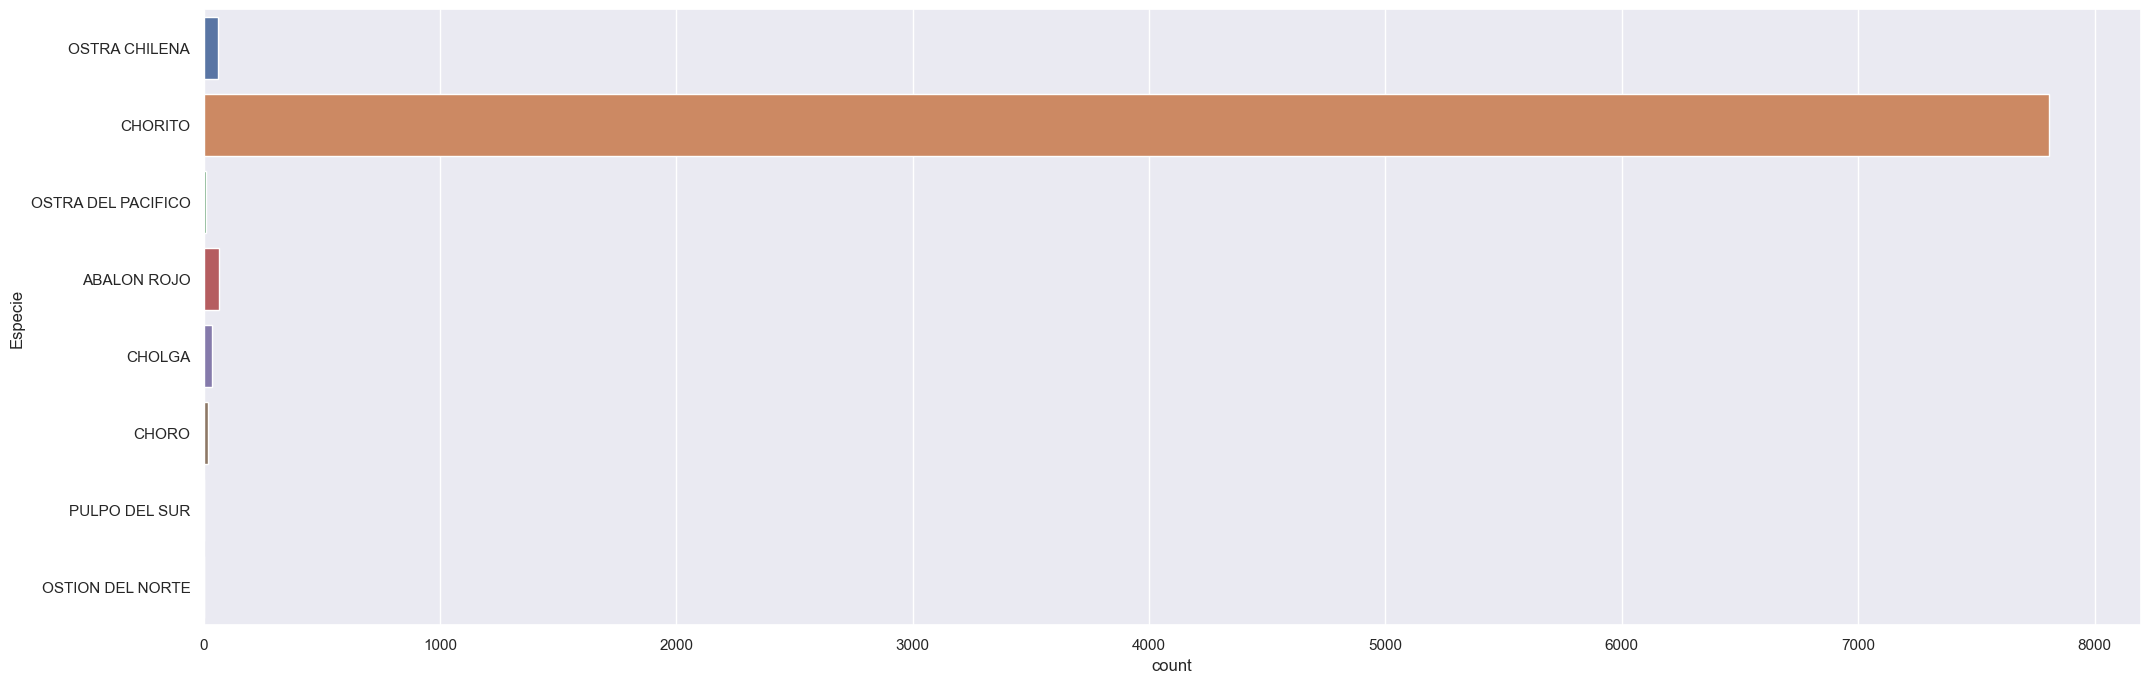

In [21]:
count_clases(ingresos_moluscos, 'Especie')

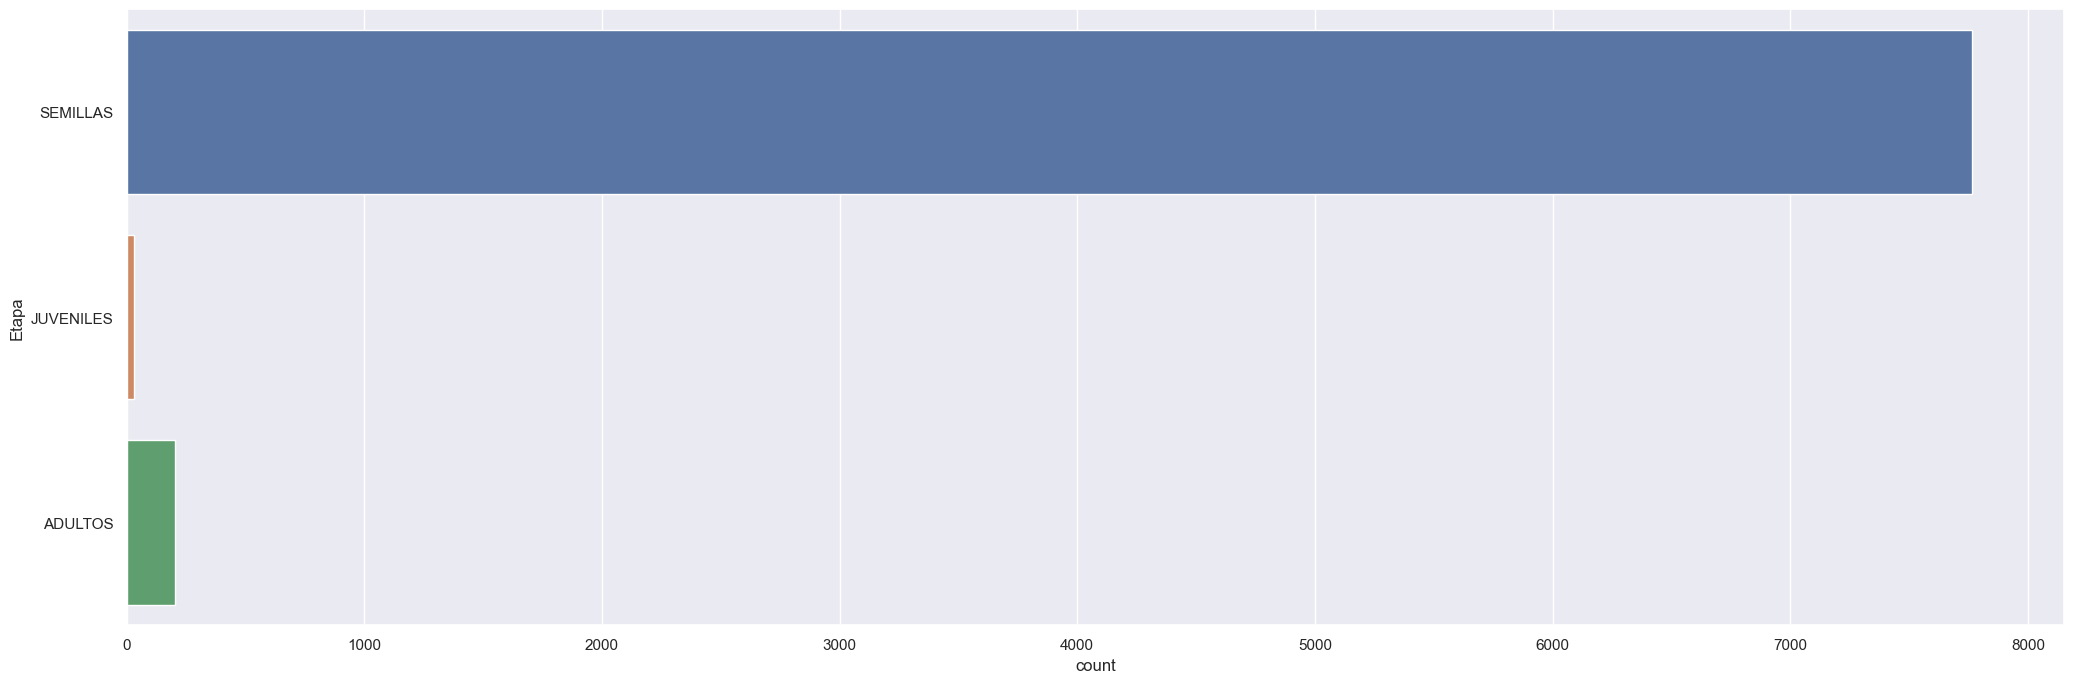

In [22]:
count_clases(ingresos_moluscos, 'Etapa')